In [6]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0,8.0)
import seaborn as sns
from scipy import stats
from scipy.stats import norm

In [2]:
data = pd.read_csv('train.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
data.axes

[RangeIndex(start=0, stop=1460, step=1),
 Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
        'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
        'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
        'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
        'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
        'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
        'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
        'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
        'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
        'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
        'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
        'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
        'GarageYrBlt', 'GarageFinish', 'GarageCars', 'Garag

- Some factors which I can think of that directly influence house prices are the following:

- Area of House
- How old is the house
- Location of the house
- How close/far is the market
- Connectivity of house location with transport
- How many floors does the house have
- What material is used in the construction
- Water /Electricity availability
- Play area / parks for kids (if any)
- If terrace is available
- If car parking is available
- If security is available
- …keep thinking. I am sure you can come up with many more apart from these.

In [12]:
print('The train data set has {0} rows and {1} columns'.format(data.shape[0],data.shape[1]))

The train data set has 1460 rows and 81 columns


In [20]:
mis= data.isnull().sum()/data.shape[0]*100
missing_values_columns = mis[mis >0]
print(missing_values_columns)

LotFrontage     17.739726
Alley           93.767123
MasVnrType       0.547945
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64


# Missing Values Visulisation

In [27]:
missing = pd.DataFrame(mis).reset_index()
missing = missing.rename(columns = {'index':'Column_name',0:'Missing_Value_Percentage'})
missing.head()

,Column_name,Missing_Value_Percentage
0,Id,0.000000
1,MSSubClass,0.000000
2,MSZoning,0.000000
3,LotFrontage,17.739726
4,LotArea,0.000000


In [35]:
import warnings
warnings.filterwarnings('ignore')

In [36]:
mask = missing['Missing_Value_Percentage'] > 0
missing_greater_than_0 = missing[mask]
missing_greater_than_0.sort_values(by = 'Missing_Value_Percentage', ascending = True, inplace = True)

Text(0.5, 1.0, 'Missing Values Visulisation')

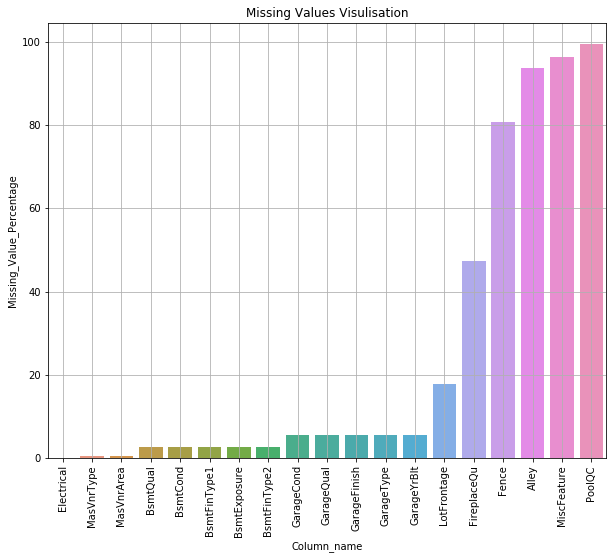

In [37]:
sns.barplot(missing_greater_than_0['Column_name'],missing_greater_than_0['Missing_Value_Percentage'])
plt.grid(True)
plt.xticks(rotation = 90)
plt.title('Missing Values Visulisation')

# Checking the distribution of Target Variable (SalePrice)

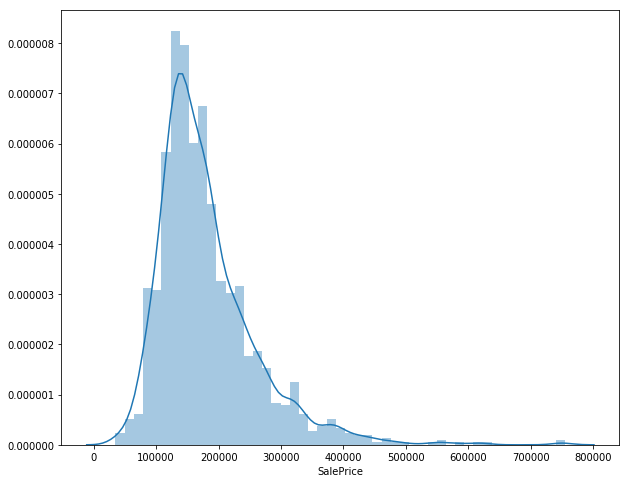

In [38]:
sns.distplot(data['SalePrice'])

We see that the target variable SalePrice has a right-skewed distribution. We'll need to log transform this variable so that it becomes normally distributed. A normally distributed (or close to normal) target variable helps in better modeling the relationship between target and independent variables. In addition, linear algorithms assume constant variance in the error term. Alternatively, we can also confirm this skewed behavior using the skewness metric.

In [39]:
data['SalePrice'].skew()

1.8828757597682129

In [40]:
print('The skewness of the target variable is {0}'.format(data['SalePrice'].skew()))

The skewness of the target variable is 1.8828757597682129


- Let's log transform this variable and see if this variable distribution can get any closer to normal.

In [42]:
target = np.log(data['SalePrice'])
print('Skewness is',target.skew())

Skewness is 0.12133506220520406


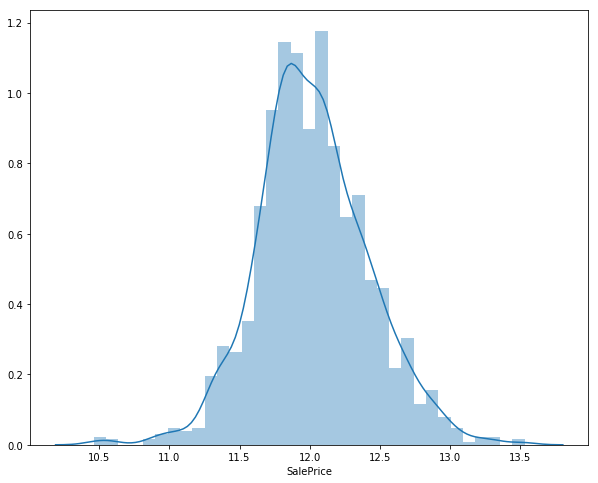

In [43]:
sns.distplot(target)

- As you saw, log transformation of the target variable has helped us fixing its skewed distribution and the new distribution looks closer to normal. Since we have 80 variables, visualizing one by one wouldn't be an astute approach. Instead, we'll look at some variables based on their correlation with the target variable. However, there's a way to plot all variables at once, and we'll look at it as well. Moving forward, we'll separate numeric and categorical variables and explore this data from a different angle.

In [45]:
# separate variables in to new dataframes
numeric_data = data.select_dtypes(include = [np.number])
categorical_data = data.select_dtypes(exclude = [np.number])
print('There are {} numerical variables and {} categorical variables'
      .format(numeric_data.shape[1],categorical_data.shape[1]))

There are 38 numerical variables and 43 categorical variables


In [47]:
numeric_data.shape

(1460, 38)

In [49]:
numeric_data.head(3)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500


- we should remove Id column from numeric_data

In [50]:
numeric_data.drop(columns = ['Id'],inplace = True)
numeric_data.head(3)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500


- Now, we are interested to learn about the correlation behavior of numeric variables. Out of 37 variables, I presume some of them must be correlated. If found, we can later remove these correlated variables as they won't provide any useful information to the model.

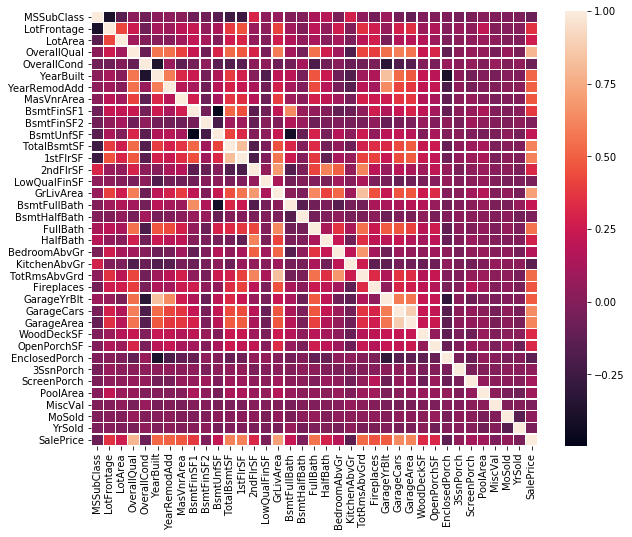

In [52]:
# Correlation plot
corr = numeric_data.corr()
sns.heatmap(corr,linewidths=.5)

In [55]:
corr.head(3)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,-0.065649,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,0.049900,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843


In [61]:
# Taking correlation with target variable SalePrice
print(corr['SalePrice'].sort_values(ascending = False)[:10]) # top 10 values

print('--------------------------------------')

print(corr['SalePrice'].sort_values(ascending = False)[-5:]) # last 5 values

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64
--------------------------------------
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


- Here we see that the OverallQual feature is 79% correlated with the target variable. Overallqual feature refers to the overall material and quality of the materials of the completed house. Well, this make sense as well. People usually consider these parameters for their dream house. In addition, GrLivArea is 70% correlated with the target variable. GrLivArea refers to the living area (in sq ft.) above ground. The following variables show people also care about if the house has a garage, the area of that garage, the size of the basement area, etc.

In [62]:
# Let's check the OverallQual variable in detail because it has high correlation with SalePrice.
data['OverallQual'].unique()

array([ 7,  6,  8,  5,  9,  4, 10,  3,  1,  2], dtype=int64)

- The overall quality is measured on a scale of 1 to 10. Hence, we can fairly treat it as an ordinal variable. An ordinal variable has an inherent order. For example, Rank of students in class, data collected on Likert scale, etc. Let's check the median sale price of houses with respect to OverallQual. You might be wondering, “Why median ?” We are using median because the target variable is skewed. A skewed variable has outliers and median is robust to outliers.

- We can create such aggregated tables using pandas pivot tables quite easily.

In [66]:
# lets check the mean price per quality and plot it.
pivot = data.pivot_table(index = 'OverallQual',values = 'SalePrice', aggfunc = np.median).reset_index()
pivot = pivot.rename(columns = {'SalePrice': 'Median_Sale_Price'})
pivot.sort_values(by = 'Median_Sale_Price',ascending = True,inplace = True)
pivot

,OverallQual,Median_Sale_Price
0,1,50150
1,2,60000
2,3,86250
3,4,108000
4,5,133000
5,6,160000
6,7,200141
7,8,269750
8,9,345000
9,10,432390


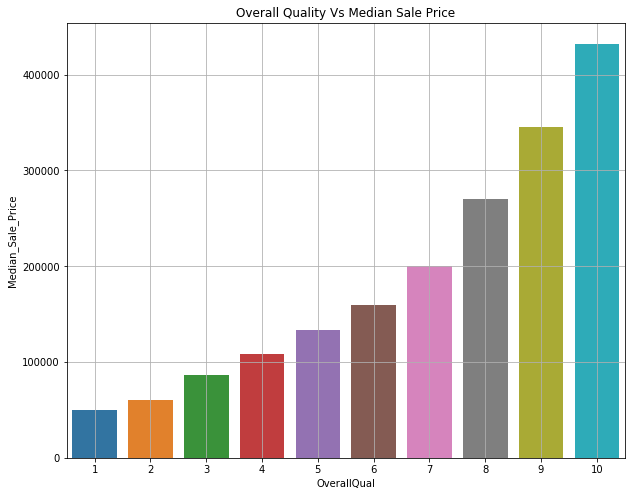

In [67]:
# lets plot Overall Quality Vs Median Sale Price
sns.barplot(pivot['OverallQual'],pivot['Median_Sale_Price'])
plt.grid(True)
plt.title('Overall Quality Vs Median Sale Price')
plt.show()

- This behavior is quite normal. As the overall quality of a house increases, its sale price also increases. Let's visualize the next correlated variable GrLivArea and understand their behavior.

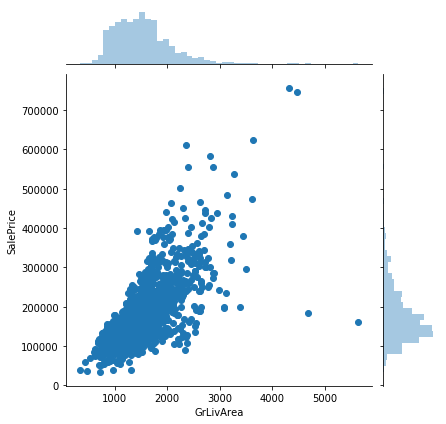

In [70]:
# lets plot GrLivArea Vs SalePrice
sns.jointplot(x = data['GrLivArea'],y = data['SalePrice'])

- As seen above, here also we see a direct correlation of living area with sale price. However, we can spot an outlier value GrLivArea > 5000. I've seen outliers play a significant role in spoiling a model's performance. Hence, we'll get rid of it. If you are enjoying this activity, you can visualize other correlated variables as well. Now, we'll move forward and explore categorical features. The simplest way to understand categorical variables is using .describe() command.

# Understanding Categorical Variable behaviour

In [72]:
categorical_data.head(3)

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [71]:
categorical_data.describe()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198
